<a href="https://colab.research.google.com/github/tuba89/simpleNN_fashion/blob/main/ANN_Fashion_Feedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this practical, we implement and train a feed-forward neural network (also known as an "MLP" for "multi-layer perceptron") on a dataset called "Fashion MNIST", consisting of small greyscale images of items of fashion.

# Learning Objectives

* Understand how to use Keras Layers to build a neural network architecture
* Understand how a model is trained and evaluated
* Understand the concept of train/validation/test split and why it's useful

In [1]:
from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf


# Data
In this practical, we use the Fashion MNIST dataset consisting of 70,000 greyscale images and their labels. The dataset is divided
 into 60,000 training images and 10,000 test images. The idea is to train a **classifier** to identify the class value (what type of fashion item it is) given the image. We train and *tune* a model on the 60,000 training images and then evaluate how well it classifies the 10,000 test images that the model did not see during training. This task is an example of a **supervised learning** problem, where we are given both input and labels (targets) to learn from. This is in contrast to **unsupervised learning** where we only have inputs from which to learn patterns or **reinforcement learning** where an agent learns how to maximise a reward signal through interaction with its environment. 

![Texte alternatif…](https://res.cloudinary.com/practicaldev/image/fetch/s---fNWEeWA--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

# Train/Validation/Test Split

When we build machine learning models, the goal is to build a model that will perform well on future data that we have not seen yet. We say that we want our models to be able to generalise well from whatever training data we can collect and do have available, to whatever data we will be applying them to in future. To do this, we split whatever data we have available into a training set, a validation set and a test set. The idea is that we train our model and use the performance on the validation set to make any adjustments to the model and its hyperparameters, but then we report the final accuracy on the test set. The test set (which we never train on), therefore acts as a proxy for our future data.

In [2]:
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Construct a validation set from the last 10 000 images and labels from 
# train_and_validation_images and train_and_validation_labels
validation_images = train_and_validation_images[-10000:, :, :]
validation_labels = train_and_validation_labels[-10000:] # 0 to 9

# Construct a training set from the first 50 000 images and labels.
train_images = train_and_validation_images[:50000, :, :]
train_labels = train_and_validation_labels[:50000]

In [4]:
train_labels

array([9, 0, 0, ..., 5, 1, 7], dtype=uint8)

In [5]:
text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

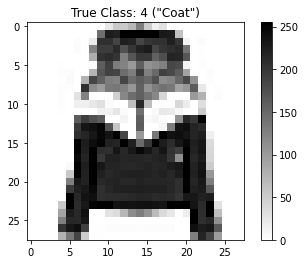

In [6]:
plt.figure()
random_index = np.random.randint(0, len(train_images))
plt.imshow(train_images[random_index], cmap=plt.cm.binary)
plt.colorbar()
numerical_label = train_labels[random_index]
text_description = text_labels[numerical_label]
plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))

plt.gca().grid(False)

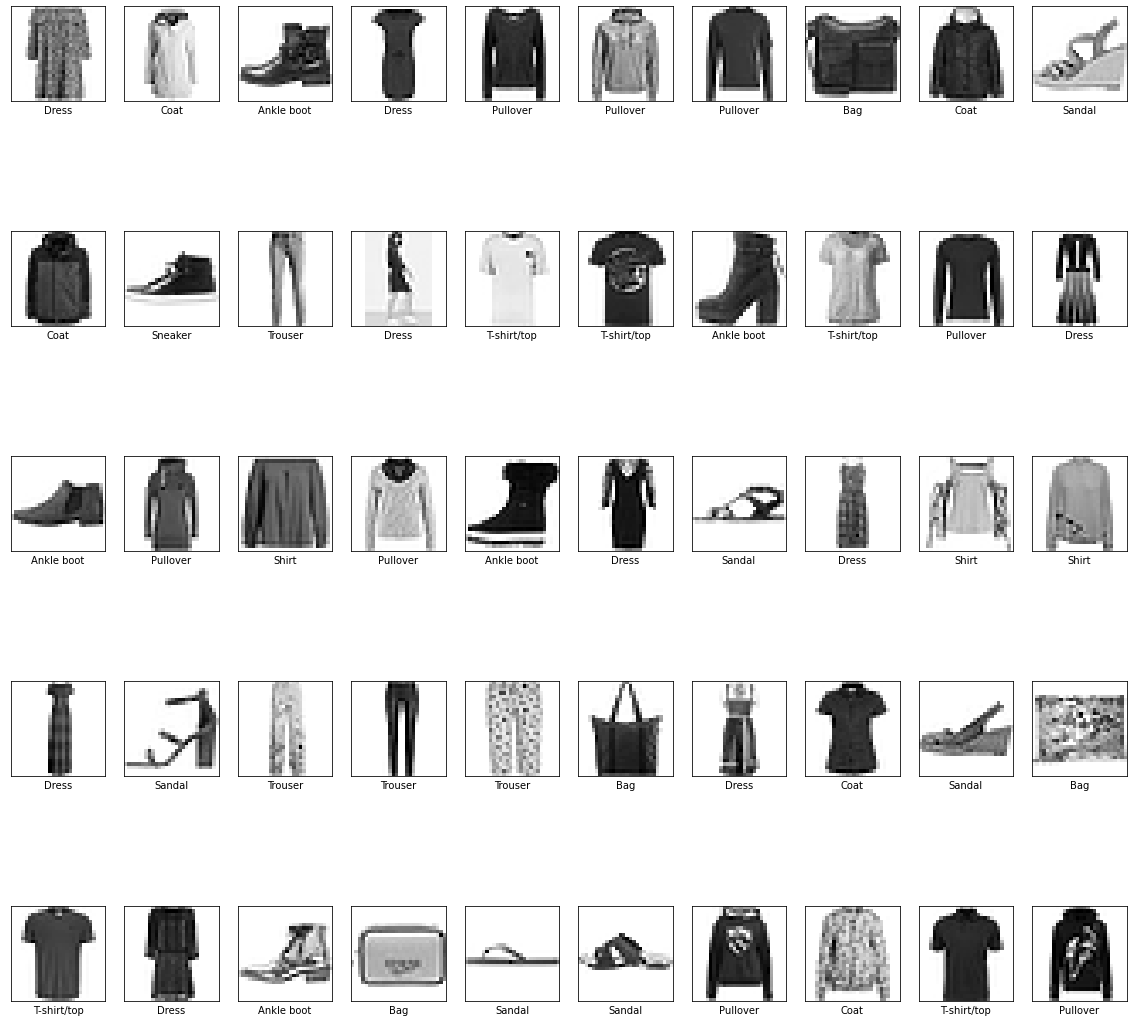

In [7]:
# Another view, showing 50 randomly selected images at a time
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 50000)
    plt.imshow(train_images[img_index], cmap=plt.cm.binary)
    plt.xlabel(text_labels[train_labels[img_index]])

# Preprocess

In [8]:
# Flatten

train_images_flatten = train_images.reshape(train_images.shape[0], 784)
validation_images_flatten = validation_images.reshape(validation_images.shape[0], 784)
test_images_flatten = test_images.reshape(test_images.shape[0], 784)



In [9]:
# Normalize

train_images_model = train_images_flatten/255.
validation_images_model = validation_images_flatten/255.
test_images_model = test_images_flatten / 255.

In [10]:
# convert class vectors to binary class matrices
train_labels_categ = tf.keras.utils.to_categorical(train_labels, 10)
validation_labels_categ = tf.keras.utils.to_categorical(validation_labels, 10)
test_labels_categ = tf.keras.utils.to_categorical(test_labels, 10)

In [11]:
train_images_model
validation_images_model
test_images_model

train_labels_categ
validation_labels_categ
test_labels_categ

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Train

In [12]:
batch_size = 128
num_classes = 10
epochs = 40


##First model :

In [13]:
model_1 = Sequential()
model_1.add(Dense(units=256, activation="relu"))
model_1.add(Dense(units=128, activation="relu"))
model_1.add(Dense(units=10, activation="relu"))

In [14]:
model_1.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(),
                metrics=['accuracy'])



In [15]:
history = model_1.fit(train_images_model, train_labels_categ,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(validation_images_model, validation_labels_categ))

Epoch 1/40
391/391 [==============================] - 26s 9ms/step - loss: nan - accuracy: 0.2803 - val_loss: nan - val_accuracy: 0.1023
Epoch 2/40
391/391 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.0994 - val_loss: nan - val_accuracy: 0.1023
Epoch 3/40
391/391 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.1023
Epoch 4/40
391/391 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.1023
Epoch 5/40
391/391 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.1011 - val_loss: nan - val_accuracy: 0.1023
Epoch 6/40
391/391 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.0982 - val_loss: nan - val_accuracy: 0.1023
Epoch 7/40
391/391 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1023
Epoch 8/40
391/391 [===========================

In [16]:
model_1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


# Test1

In [55]:
score1 = model_1.evaluate(test_images_model, test_labels_categ, verbose=0)
# print('Test accuracy:', score[1])
print(f'{score1[1]*100:.2f} % Accuracy on the Test set')
# You should be able to get,at least, 88% accuracy Test accuracy: 0.8837000131607056

10.00 % Accuracy on the Test set


* Well this model with just relu activation function gave me 10% accuraccy, i'll create a second model, by increasing hidden layers and try other activations functions

##Second Model

In [18]:


# Create a sequential model here 
model_2 = keras.models.Sequential([
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units = 128, activation = 'elu'),
                                 keras.layers.Dropout(0.25),
                                 keras.layers.Dense(units = 256, activation = 'relu'),
                                 keras.layers.Dropout(0),
                                 keras.layers.Dense(units = 256, activation = 'relu'),
                                 keras.layers.Dropout(0.20), 
                                 keras.layers.Dense(units = 128, activation = 'relu'),
                                 keras.layers.Dropout(0.10),
                                 keras.layers.Dense(units = 10, activation = 'softmax') 
                                 ])   
# End Code

In [19]:
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model_2.fit(train_images_model, train_labels_categ,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(validation_images_model, validation_labels_categ))


Epoch 1/40
391/391 [==============================] - 8s 12ms/step - loss: 0.8673 - accuracy: 0.6780 - val_loss: 0.4291 - val_accuracy: 0.8372
Epoch 2/40
391/391 [==============================] - 4s 11ms/step - loss: 0.4628 - accuracy: 0.8288 - val_loss: 0.4278 - val_accuracy: 0.8373
Epoch 3/40
391/391 [==============================] - 4s 10ms/step - loss: 0.4222 - accuracy: 0.8474 - val_loss: 0.4238 - val_accuracy: 0.8454
Epoch 4/40
391/391 [==============================] - 4s 10ms/step - loss: 0.3913 - accuracy: 0.8551 - val_loss: 0.4254 - val_accuracy: 0.8429
Epoch 5/40
391/391 [==============================] - 4s 10ms/step - loss: 0.3684 - accuracy: 0.8647 - val_loss: 0.3901 - val_accuracy: 0.8590
Epoch 6/40
391/391 [==============================] - 4s 11ms/step - loss: 0.3548 - accuracy: 0.8692 - val_loss: 0.3817 - val_accuracy: 0.8606
Epoch 7/40
391/391 [==============================] - 4s 10ms/step - loss: 0.3465 - accuracy: 0.8739 - val_loss: 0.3878 - val_accuracy: 0.8641

# Test2

In [57]:
score2 = model_2.evaluate(test_images_model, test_labels_categ, verbose=0)
# print('Test accuracy:', score[1])
print(f'{score2[1]*100:.2f} % Accuracy on the Test set')
# You should be able to get,at least, 88% accuracy Test accuracy: 0.8837000131607056

88.47 % Accuracy on the Test set


In [58]:
print('Loss: {:.2f}'.format(score2[0]))

Loss: 0.44


##Experimenent 2

##Third Model:

In [22]:
output_dim = 10
input_dim = train_images_model.shape[1]

batch_size = 128 
nb_epoch = 40

In [23]:
from keras.initializers import RandomNormal
model_3 = Sequential()
model_3.add(Dense(1024, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None)))
model_3.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_3.add(Dense(output_dim, activation='softmax'))

print(model_3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3.fit(train_images_model, train_labels_categ, 
                      batch_size=batch_size, 
                      epochs=nb_epoch, 
                      verbose=1, 
                      validation_data=(validation_images_model, validation_labels_categ))

Epoch 1/40
391/391 [==============================] - 11s 27ms/step - loss: 0.7362 - accuracy: 0.7650 - val_loss: 0.3847 - val_accuracy: 0.8593
Epoch 2/40
391/391 [==============================] - 10s 26ms/step - loss: 0.3642 - accuracy: 0.8681 - val_loss: 0.3621 - val_accuracy: 0.8689
Epoch 3/40
391/391 [==============================] - 10s 26ms/step - loss: 0.3194 - accuracy: 0.8831 - val_loss: 0.3921 - val_accuracy: 0.8566
Epoch 4/40
391/391 [==============================] - 10s 26ms/step - loss: 0.3004 - accuracy: 0.8878 - val_loss: 0.3228 - val_accuracy: 0.8839
Epoch 5/40
391/391 [==============================] - 10s 26ms/step - loss: 0.2742 - accuracy: 0.8959 - val_loss: 0.3312 - val_accuracy: 0.8833
Epoch 6/40
391/391 [==============================] - 10s 26ms/step - loss: 0.2619 - accuracy: 0.9028 - val_loss: 0.3454 - val_accuracy: 0.8780
Epoch 7/40
391/391 [==============================] - 10s 26ms/step - loss: 0.2467 - accuracy: 0.9088 - val_loss: 0.3180 - val_accuracy:

In [59]:
score3 = model_3.evaluate(test_images_model, test_labels_categ, verbose=0)
# print('Test accuracy:', score[1])
print(f'{score3[1]*100:.2f} % Accuracy on the Test set')
# You should be able to get,at least, 88% accuracy Test accuracy: 0.8837000131607056

88.73 % Accuracy on the Test set


In [60]:
print('Loss: {:.2f}'.format(score3[0]))

Loss: 0.57


`Note`: good accuraccy $\approx$ $88.7$% but the loss is high then the model 2 and we want to reduce the loss 

##Experiment 3

##Forth Model

In [27]:
model_4 = Sequential()
model_4.add(Dense(256, activation='relu', 
                  input_shape=(input_dim,), 
                  kernel_initializer= RandomNormal(mean=0.0, stddev=0.062, seed=None)))

model_4.add(Dense(128, activation='relu', 
                  kernel_initializer= RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_4.add(Dense(output_dim, activation='softmax'))

print(model_4.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
model_4.compile(optimizer = 'adam', 
                loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])

history = model_4.fit(train_images_model, train_labels_categ, 
                      batch_size= batch_size, 
                      epochs= nb_epoch, 
                      verbose= 1, 
                      validation_data=(validation_images_model, validation_labels_categ))

Epoch 1/40
391/391 [==============================] - 4s 7ms/step - loss: 0.6938 - accuracy: 0.7535 - val_loss: 0.4185 - val_accuracy: 0.8466
Epoch 2/40
391/391 [==============================] - 3s 6ms/step - loss: 0.3860 - accuracy: 0.8601 - val_loss: 0.3628 - val_accuracy: 0.8678
Epoch 3/40
391/391 [==============================] - 3s 6ms/step - loss: 0.3337 - accuracy: 0.8795 - val_loss: 0.3649 - val_accuracy: 0.8698
Epoch 4/40
391/391 [==============================] - 2s 6ms/step - loss: 0.3085 - accuracy: 0.8863 - val_loss: 0.3491 - val_accuracy: 0.8725
Epoch 5/40
391/391 [==============================] - 3s 6ms/step - loss: 0.2834 - accuracy: 0.8966 - val_loss: 0.3233 - val_accuracy: 0.8817
Epoch 6/40
391/391 [==============================] - 3s 6ms/step - loss: 0.2725 - accuracy: 0.9008 - val_loss: 0.3150 - val_accuracy: 0.8862
Epoch 7/40
391/391 [==============================] - 3s 6ms/step - loss: 0.2526 - accuracy: 0.9059 - val_loss: 0.3224 - val_accuracy: 0.8815
Epoch 

In [62]:
score4 = model_4.evaluate(test_images_model, test_labels_categ, verbose=0)
# print('Test accuracy:', score[1])
print(f'{score4[1]*100:.2f} % Accuracy on the Test set')
# You should be able to get,at least, 88% accuracy Test accuracy: 0.8837000131607056

89.45 % Accuracy on the Test set


In [63]:
print('Loss: {:.2f}'.format(score4[0]))

Loss: 0.50


`Note`: Also good accuracy and loss is less then the model 3 but still high 

#other model with updating learning rate

In [31]:
model_n = Sequential()

model_n.add(Dense(512, activation='relu'))

model_n.add(Dropout(0.5))
model_n.add(Dense(128, activation='relu'))

model_n.add(Dropout(0.5))
model_n.add(Dense(10, activation='softmax'))

In [34]:
from keras.optimizers import Adam

In [35]:
# Optimizer
optimizer = Adam(learning_rate=0.001, 
                 beta_1=0.9, 
                 beta_2=0.999 )

In [37]:
# Compiling the model
model_n.compile(optimizer=optimizer, 
                loss="categorical_crossentropy", 
                metrics=["accuracy"])

In [42]:
from keras.callbacks import LearningRateScheduler
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
# this update learning rate at every epoch stage

In [43]:
history = model_n.fit(train_images_model, train_labels_categ, 
                      batch_size=128, 
                      epochs= 40, 
                      verbose= 2, 
                      validation_data=(validation_images_model, validation_labels_categ),
                      callbacks = [reduce_lr])

Epoch 1/40
391/391 - 5s - loss: 0.7263 - accuracy: 0.7426 - val_loss: 0.4580 - val_accuracy: 0.8303
Epoch 2/40
391/391 - 4s - loss: 0.4915 - accuracy: 0.8237 - val_loss: 0.3994 - val_accuracy: 0.8572
Epoch 3/40
391/391 - 4s - loss: 0.4396 - accuracy: 0.8424 - val_loss: 0.3775 - val_accuracy: 0.8654
Epoch 4/40
391/391 - 4s - loss: 0.4146 - accuracy: 0.8520 - val_loss: 0.3587 - val_accuracy: 0.8716
Epoch 5/40
391/391 - 4s - loss: 0.3904 - accuracy: 0.8591 - val_loss: 0.3474 - val_accuracy: 0.8708
Epoch 6/40
391/391 - 4s - loss: 0.3775 - accuracy: 0.8646 - val_loss: 0.3529 - val_accuracy: 0.8702
Epoch 7/40
391/391 - 4s - loss: 0.3627 - accuracy: 0.8701 - val_loss: 0.3345 - val_accuracy: 0.8788
Epoch 8/40
391/391 - 4s - loss: 0.3478 - accuracy: 0.8730 - val_loss: 0.3268 - val_accuracy: 0.8827
Epoch 9/40
391/391 - 4s - loss: 0.3415 - accuracy: 0.8756 - val_loss: 0.3258 - val_accuracy: 0.8819
Epoch 10/40
391/391 - 4s - loss: 0.3297 - accuracy: 0.8816 - val_loss: 0.3147 - val_accuracy: 0.8868

In [44]:
model_n.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [47]:
score_n = model_n.evaluate(test_images_model, test_labels_categ, verbose=0)
# print('Test accuracy:', score[1])
print(f'{score_n[1]*100:.2f} % Accuracy on the Test set')
# You should be able to get,at least, 88% accuracy Test accuracy: 0.8837000131607056

89.00 % Accuracy on the Test set


In [48]:
print('Loss: {:.2f}'.format(score_n[0]))

Loss: 0.32


**`Note`**: Well this is the best model i guess 89% accurate and the cost is reduced other than the above models 

# apply GridSearch cv 

In [49]:

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import *

In [50]:
# rebuild another Neural Network model to apply GridSearch on it
def build_model(optimizer, learning_rate, activation, dropout_rate,
                initializer,num_unit):
    keras.backend.clear_session()
    model = Sequential()
    model.add(Dense(num_unit, kernel_initializer=initializer,
                    activation=activation, input_shape=(784,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_unit, kernel_initializer=initializer,
                    activation=activation))
    model.add(Dropout(dropout_rate)) 
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer(learning_rate= learning_rate),
                  metrics=['accuracy'])
    return model

In [51]:
# Hyper-Parameters
# [:1] is for testing

batch_size = [20, 50, 100][:1]
epochs = [1, 20, 50][:1]
initializer = ['lecun_uniform', 'normal', 'he_normal', 'he_uniform'][:1]

learning_rate = [0.1, 0.001, 0.02][:1]
dropout_rate = [0.3, 0.2, 0.8][:1]

num_unit = [10, 5][:1]

activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'][:1]
optimizer = [SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam][:1]

In [52]:
# Creat the wrapper and pass parameters to GridSearchCV 
# parameters is a dictionary with the entire values

parameters = dict(batch_size = batch_size,
                  epochs = epochs,
                  dropout_rate = dropout_rate,
                  num_unit = num_unit,
                  initializer = initializer,
                  learning_rate = learning_rate,
                  activation = activation,
                  optimizer = optimizer)

model4 = KerasClassifier(build_fn=build_model, verbose=0)

models = GridSearchCV(estimator = model4, param_grid=parameters, n_jobs=1)

In [53]:
import pprint
pp = pprint.PrettyPrinter(indent = 4)

###Train the Models 

In [54]:
best_model = models.fit(train_images_model, train_labels_categ)
print("="*40, '\nThe Best  hypper-parameter values are :\n',"="*40)
pp.pprint(best_model.best_params_)

The Best  hypper-parameter values are :
{   'activation': 'relu',
    'batch_size': 20,
    'dropout_rate': 0.3,
    'epochs': 1,
    'initializer': 'lecun_uniform',
    'learning_rate': 0.1,
    'num_unit': 10,
    'optimizer': <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>}


In [64]:
test_logits = model_n.predict(test_images_flatten)

In [65]:
test_logits

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [66]:
test_predictions = np.argmax(test_logits, axis=1)


In [67]:
test_predictions

array([9, 2, 1, ..., 8, 1, 5])

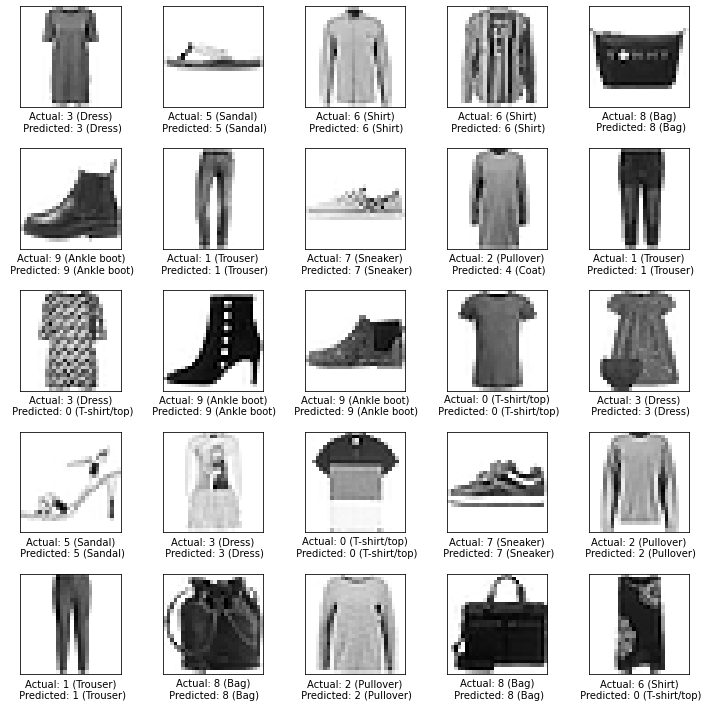

In [68]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 10000)
    plt.imshow(test_images[img_index], cmap=plt.cm.binary)
    
    actual_label = int(test_labels[img_index])
    predicted_label = int(test_predictions[img_index])
    
    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        actual_label, text_labels[actual_label], predicted_label, text_labels[predicted_label]
    ))
    
plt.tight_layout()
plt.show()

### **The model predicts 3 wrongs items from 25 wich is pretty good**:
- 4: Coat and it was 2: Pullover
- and, 0: t-shirt and it was 3: Dress 
- at last, predicted shirt6 as t-shirt0

In [69]:
test_images_model.shape

(10000, 784)

In [70]:
test_labels_categ.shape

(10000, 10)

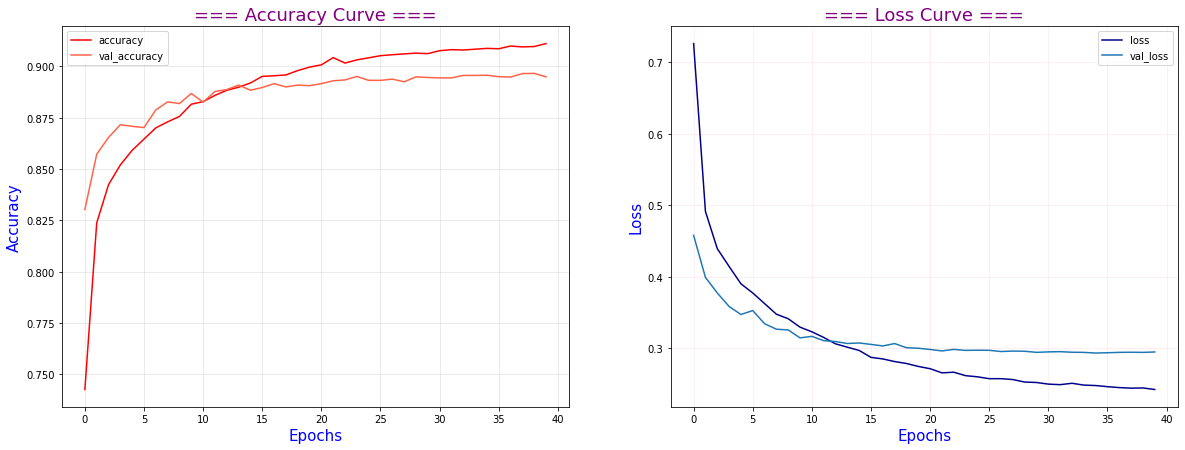

In [71]:
# Summarize the training process
fig = plt.figure(figsize=(20,7))
fig.add_subplot(121)

# Accuracy
plt.plot(history.epoch, 
         history.history['accuracy'], 
         label = "accuracy",
         color="r")
plt.plot(history.epoch, 
         history.history['val_accuracy'], 
         label = "val_accuracy",
         color="tomato")

plt.title("=== Accuracy Curve ===", fontsize=18, c="purple")
plt.xlabel("Epochs", fontsize=15, c="b")
plt.ylabel("Accuracy", fontsize=15, c="b")
plt.grid(alpha=0.3)
plt.legend()


#Adding Subplot 1 (For Loss)
fig.add_subplot(122)

plt.plot(history.epoch, history.history['loss'], label="loss", color="darkblue")
plt.plot(history.epoch, history.history['val_loss'], label="val_loss")

plt.title("=== Loss Curve ===", fontsize=18, c="purple")
plt.xlabel("Epochs", fontsize=15, c="b")
plt.ylabel("Loss", fontsize=15, c="b")
plt.grid(alpha=0.3, c="pink")
plt.legend()

plt.show()

###score Report

In [121]:
from sklearn.metrics import classification_report, confusion_matrix

In [122]:
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [123]:
predictions = model_n.predict(test_images_model)
# Convert predictions classes to one hot vectors 
predictions_classes = np.argmax(predictions, axis = 1)
# Convert test set observations to one hot vectors
y_true = np.argmax(test_labels_categ, axis = 1)

In [120]:
print(classification_report(y_true, predictions_classes, target_names = classes))

              precision    recall  f1-score   support

 T-shirt/Top       0.83      0.85      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.79      0.81      0.80      1000
       Dress       0.89      0.90      0.90      1000
        Coat       0.80      0.82      0.81      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.73      0.68      0.70      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.97      0.98      0.97      1000
  Ankle Boot       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



###The model has some difficult to predict the shirt images = 
- about 70% of Shirts correctly from total images it predicted as Shirts
- and the rest is predicted wrong

##Plot confusion Matrix 

In [83]:
import itertools

In [116]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.PuBuGn):
    plt.figure(figsize=(18,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=18, c="DarkOrchid")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

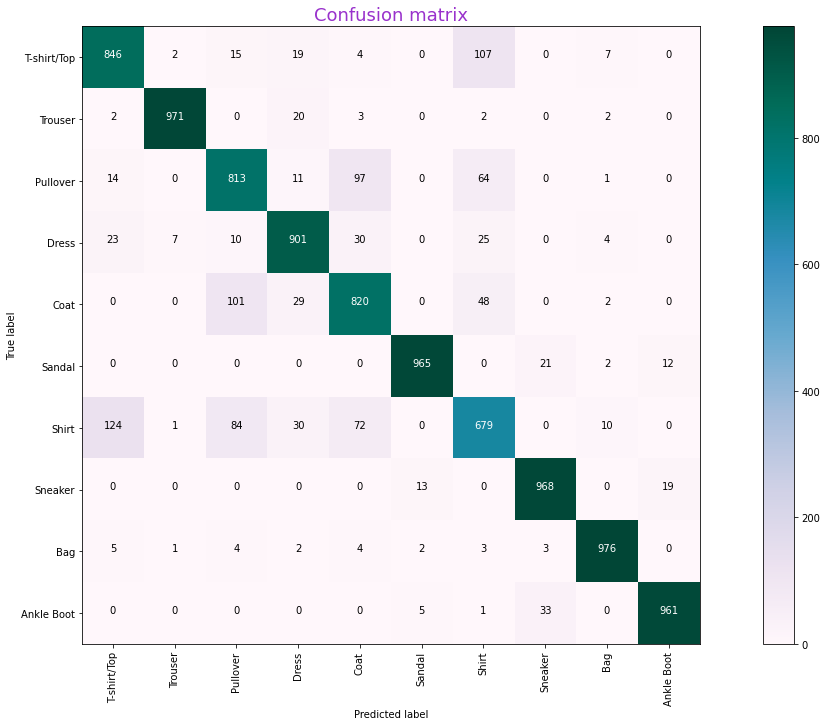

In [117]:
# Predict the values from the validation dataset
Y_pred = model_n.predict(test_images_model)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,
                           axis = 1) 

# Convert validation labels to one hot vectors
Y_true = np.argmax(test_labels_categ,
                   axis = 1) 

#confusion matrix
confusion = confusion_matrix(Y_true, Y_pred_classes) 

# plot the confusion matrix
plot_confusion_matrix(confusion, 
            classes = classes)

#### Also, we can see that a large number of T-shirt/top are wrongly classified as Shirt, also pullover and coat, the same results as the report above
